# Analysis to aid in development of a wordle challenge helper  
---
## Notebook goal: using data analysis, discover trends in 5-letter english words to develop the logic needed to automate a wordle solver.


### First step of analysis: determine the best **first guess** to use in a game of wordle  

We can look at the most-used letters for five-letter words to see if there is any stand-out first guesses

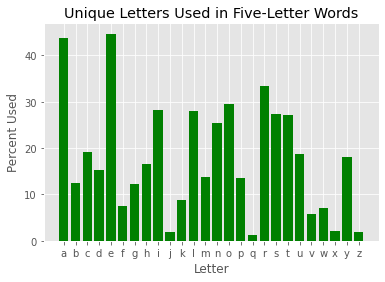

In [13]:
from english_words import english_words_lower_alpha_set
from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

allWords = list(english_words_lower_alpha_set)
words = [i for i in allWords if len(i) == 5]
words.remove('u.s.a')   # 'u.s.a' considered a word for some reason

numWords = len(words)
letters = {
    'a' : 0, 'b' : 0,
    'c' : 0, 'd' : 0,
    'e' : 0, 'f' : 0,
    'g' : 0, 'h' : 0,
    'i' : 0, 'j' : 0,
    'k' : 0, 'l' : 0,
    'm' : 0, 'n' : 0,
    'o' : 0, 'p' : 0,
    'q' : 0, 'r' : 0,
    's' : 0, 't' : 0,
    'u' : 0, 'v' : 0,
    'w' : 0, 'x' : 0,
    'y' : 0, 'z' : 0
}

for word in words:
    usedLetters = []
    for letter in word:
        if letter not in usedLetters:
            letters[letter] += 1
            usedLetters.append(letter)

x = []
y = []
for key in letters:
    x.append(key)
    y.append((letters[key]/numWords) * 100)
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green')
plt.xlabel('Letter')
plt.ylabel('Percent Used')
plt.title('Unique Letters Used in Five-Letter Words')

plt.xticks(x_pos, x)

plt.show()

It appears as though the most common letters are:

* e
* a
* r
* o
* i
* l
* s
* t

While a, e, r, o, and i don't come together to make a five-letter word, we can find the best combo of letters by assigning a value to all combinations of five-letter words that can be made from these above letters. We can assign a value by adding together the % used value for each of the five letters for each combination.

Once we know the values for all combinations, we can start from the highest value combos and work our way down. These combos will then be tested for whether there is a word that contains all five. If there is a word, this is the most optimum starting wordle word!

In [60]:
from itertools import combinations

# Create all combinations of 5 letters and store them in a dictionary
topLetters = ['a', 'e', 'r', 'o', 'i', 'l', 's', 't']
combos = combinations(topLetters, 5)
values = {}
for i in list(combos):
    values[''.join(i)] = 0

# Assign values to each of the combinations
for key in values:
    for i in key:
        values[key] += (letters[i]/numWords) 

# Sort the values dictionary by value
values = dict(sorted(values.items(), key=lambda item: item[1], reverse=True))

def findWord(testLetters):
    '''
    Given a list of test letters, will try to find a word with all five
    '''
    print(f'    Testing combo {testLetters}')
    firstWord = None
    for word in words:
        goodLetters = [i for i in testLetters]
        for letter in word:
            if letter in goodLetters:
                goodLetters.remove(letter)
        if len(goodLetters) == 0:
            print(f'Best word: {word}')
            firstWord = word
            return True, firstWord
    return False, None

optimized = False
for key in values:
    if not optimized:
        check, word = findWord([char for char in key])
        if check:
            print(f'Best combination of letters: {key}')
            print(f'Best word to use: {word}')
            optimized = True


    Testing combo ['a', 'e', 'r', 'o', 'i']
    Testing combo ['a', 'e', 'r', 'o', 'l']
    Testing combo ['a', 'e', 'r', 'o', 's']
Best word: arose
Best combination of letters: aeros
Best word to use: arose


From the above analysis, we can make the conclusion that the best combination of letters to use is 'a', 'e', 'r', 'o', and 's', and one word that fits this combination is the word **arose**. This should be the first word tested in a game of Wordle. 